# Example 1: M/M/n-0 loss system
---
> (c) Tobias Hossfeld (April 2025)
>
> This script and the figures are part of the following book. The book is to be cited whenever the script is used (copyright CC BY-SA 4.0):
> Tran-Gia, P. & Hossfeld, T. (2021). Performance Modeling and Analysis of Communication Networks - A Lecture Note. Würzburg University Press. https://doi.org/10.25972/WUP-978-3-95826-153-2
---

This notebook demonstrates how to model, analyze, and visualize an M/M/n-0 loss system using the Continuous-Time Markov Chain (CTMC) framework. We use the proposed graph-based class `StateTransitionGraph` (imported from `MarkovModelModule`) to represent states and transitions, simulate dynamics, and compute system performance metrics.

The objectives of this example are as follows:
- Define an M/M/n/0 queue as a state transition graph
- Compute the steady-state probabilities of each state
- Derive basic performance measures such as: Blocking probability, Idle probability, Expected number of jobs in the system
- Visualize the state probabilities and transition graph
- Run and animate a Markov simulation through the state space

## Definition of the State Transition Graph
The function `createMMn` builds the state transition graph representing the M/M/n-0 queueing system, where arrivals and service processes are modeled as transitions with symbolic rates. The symbolic rates are generated based on the specified keys in `parameters`.

It adds forward and backward transitions between states for job arrivals and departures, respectively, and assigns default labels and visual styles to all states. The blocking state (when all servers are busy) is highlighted explicitly for visualization. Colors are defined in the file `Constants.py`.

In [1]:
from MarkovModelModule import StateTransitionGraph # imports class     
import Constants as const

import matplotlib.pyplot as plt  # For plotting
import numpy as np
        
#%% create a transition graph for M/M/n-0
def createMMn(lam=1.0, mu=1.0, n=5):
    parameters={'lambda':lam, 'mu':1.0, 'n':5}
    G = StateTransitionGraph(parameters)
    
    # define transitions    
    for i in range(n):
        G.addTransition(i, i+1, G.sym("lambda"), tid = const.ARRIVAL)    
        G.addTransition(i+1, i, (i+1)*G.sym("mu"), tid = const.DEPARTURE)    
    
    # set default labels and colors for nodes
    G.setAllStateDefaultProperties() # labels and colors
    G.setStateColor(G.n, const.COLOR_NODE_BLOCKING)  # blocking

    return G

#%% create transition graph and compute system characteristics
G = createMMn()
print(f"Transition graph is created. There are {len(G)} states.")

Transition graph is created. There are 6 states.


## Visulization of the Transition Graph
We visualize the Markov model as a directed graph, where each state is positioned linearly along the x-axis. The `drawTransitionGraph` function renders the graph with curved edges and labeled transition rates, making the structure and dynamics of the CTMC easy to interpret.

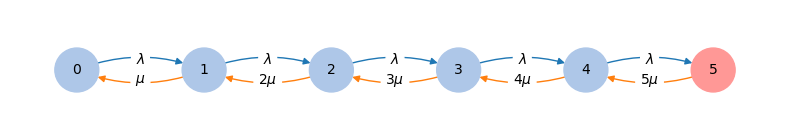

In [2]:
#%% Plotting the graph
pos = {s:(s,0) for s in G.states()}
G.drawTransitionGraph(pos, bended=True, label_pos=0.5, figsize=(8,1.5));
plt.tight_layout();

## Computation of Steady-State Probabilities and System Characteristics
We compute key performance indicators of the system based on the **steady-state probabilities**. After solving the balance equations, it extracts values such as the **blocking probability** (probability that all servers are busy), the **idle probability** (system is empty), and the **expected number of jobs** in the system. The resulting state probabilities are then visualized in a bar chart, providing a clear overview of the system's long-run behavior.

blocking_prob = 0.0031
idle_prob = 0.3681
expectedNumbers = 0.9969


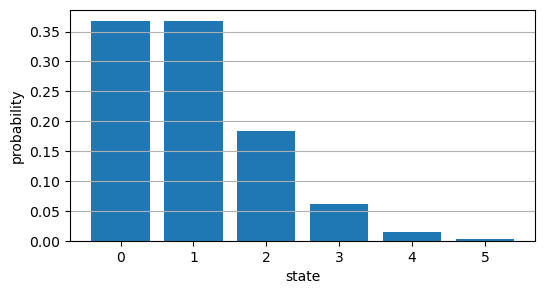

In [3]:
# compute system characteristics based on steady state probs
def getSystemCharacteristicsSimple(G):    
    res = {"blocking_prob": G.prob(G.n), "idle_prob": G.prob(0), 
           "expectedNumbers": np.sum( [s*G.prob(s) for s in G.states()] )}    
    return res

probs = G.calcSteadyStateProbs() # this is required to compute the steady state probabilities
res = getSystemCharacteristicsSimple(G)
for k in res:
    print(f"{k} = {res[k]:.4f}")

plt.figure(1, clear=True, figsize=(6,3))
plt.bar(probs.keys(), probs.values())
plt.xlabel('state')
plt.ylabel('probability')
plt.grid(axis='y', which='major')

## Markov Simulation
In this final step, a **discrete-event simulation** of the Markov process is performed, starting from the empty state (`0`) and generating 20 transition events. The resulting trajectory (`states`, `times`) is then animated directly on the transition graph, where each visited state is briefly highlighted. This visualizes the **dynamic behavior** of the system over time and complements the analytical steady-state results with an intuitive, temporal representation.

The `expectedTimePerState` parameter in animateSimulation() controls the speed of the animation by specifying how long (in real time, in seconds) the average time spent in a state should appear on screen.

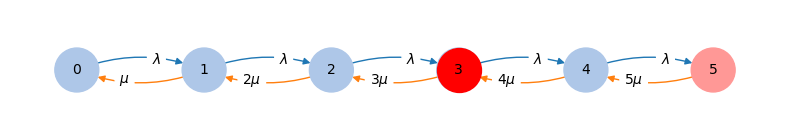

In [5]:
#%% Simulate and animate in Graph
states, times = G.simulateMarkovModel(startNode=0, numEvents=20)
G.animateSimulation(expectedTimePerState=0.5, states=states, times=times, 
                    pos=pos, bended=True, figsize=(8,1.5), 
                    inNotebook=True);